# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Load the dataset
df=pd.read_csv('diabetes.csv')

In [4]:
#Number of rows and columns in dataset
df.shape

(768, 9)

In [5]:
#Examine the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Print a sample of 10 rows to get an idea about the data
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
675,6,195,70,0,0,30.9,0.328,31,1
729,2,92,52,0,0,30.1,0.141,22,0
371,0,118,64,23,89,0.0,1.731,21,0
494,3,80,0,0,0,0.0,0.174,22,0
651,1,117,60,23,106,33.8,0.466,27,0
459,9,134,74,33,60,25.9,0.460,81,0
88,15,136,70,32,110,37.1,0.153,43,1
262,4,95,70,32,0,32.1,0.612,24,0
510,12,84,72,31,0,29.7,0.297,46,1


In [8]:
# We do not have null values after we run df.info () but we have zero values in some rows- check how many zero values
print('Number of zero values in Glucose', df[df['Glucose']==0].shape[0])
print('Number of zero values in BloodPressure', df[df['BloodPressure']==0].shape[0])
print('Number of zero values in SkinThickness', df[df['SkinThickness']==0].shape[0])
print('Number of zero values in Insulin', df[df['Insulin']==0].shape[0])
print('Number of zero values in BMI', df[df['BMI']==0].shape[0])
print('Number of zero values in DiabetesPedigreeFunction', df[df['DiabetesPedigreeFunction']==0].shape[0])
print('Number of zero values in Age', df[df['Age']==0].shape[0])

Number of zero values in Glucose 5
Number of zero values in BloodPressure 35
Number of zero values in SkinThickness 227
Number of zero values in Insulin 374
Number of zero values in BMI 11
Number of zero values in DiabetesPedigreeFunction 0
Number of zero values in Age 0


In [9]:
# Statistical measures of the data to get more insight 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Using Transpose to get deeper information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
# Number of diabetics and non-diabetics
df['Outcome'].value_counts() # 0-non-diabetic / 1-diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# Get the mean value of all the predictor variables for diabetics and non-diabetics
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: xlabel='Outcome', ylabel='Pregnancies'>

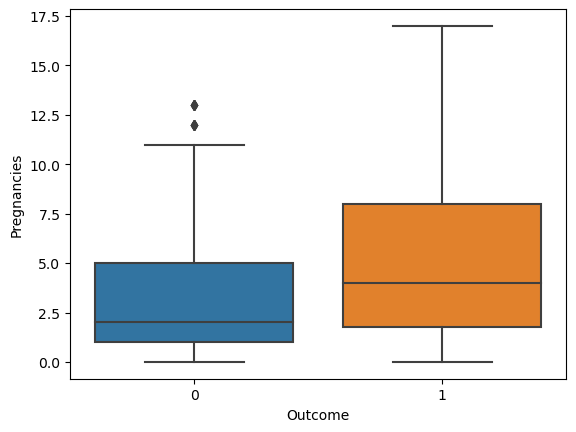

In [13]:
# How is pregnancy related to the outcome variable
sns.boxplot(x='Outcome', y='Pregnancies',data=df)

<Axes: xlabel='Outcome', ylabel='Glucose'>

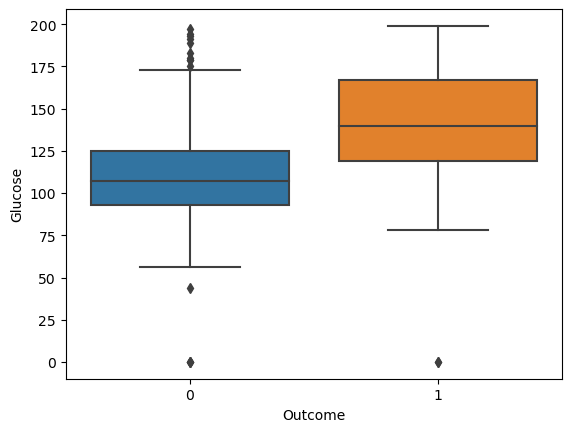

In [14]:
# How is Glucose related to the outcome variable
sns.boxplot(x='Outcome', y='Glucose',data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

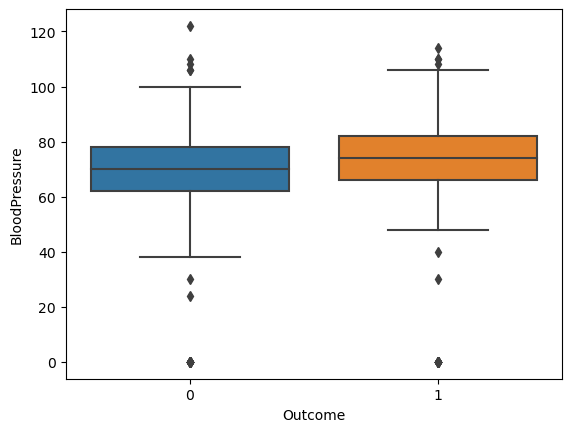

In [131]:
# How is BloodPressure related to the outcome variable
sns.boxplot(x='Outcome', y='BloodPressure',data=df)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

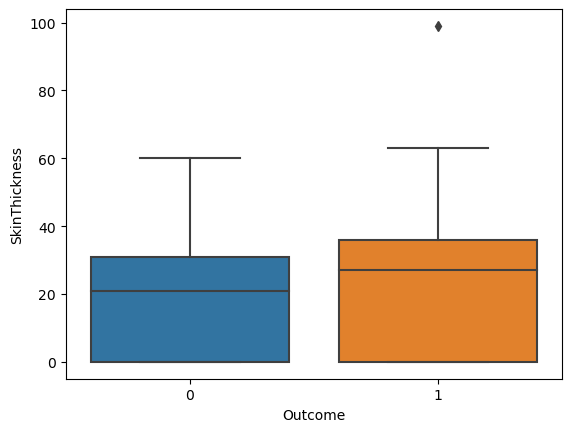

In [132]:
# How is SkinThickness related to the outcome variable
sns.boxplot(x='Outcome', y='SkinThickness',data=df)

<Axes: xlabel='Outcome', ylabel='Insulin'>

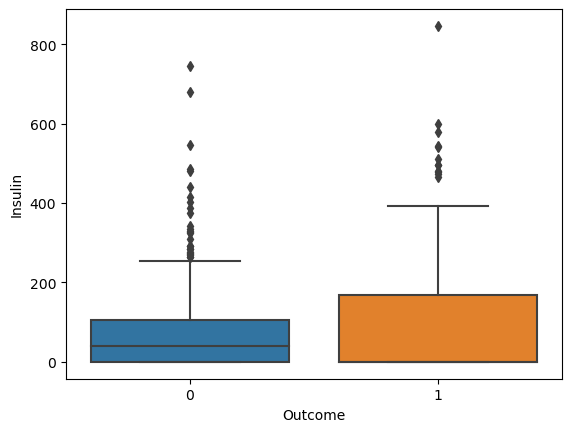

In [133]:
# How is Insulin related to the outcome variable
sns.boxplot(x='Outcome', y='Insulin',data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

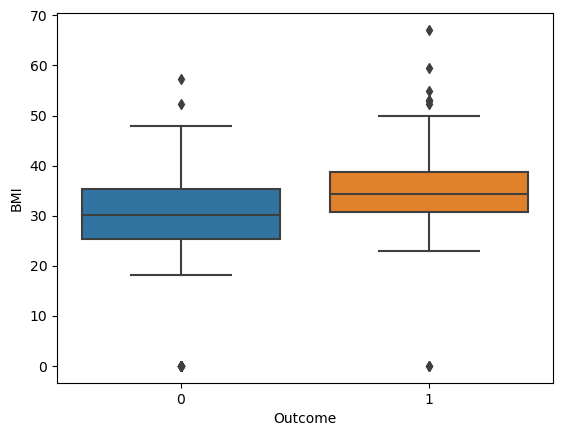

In [134]:
# How is BMI related to the outcome variable
sns.boxplot(x='Outcome', y='BMI',data=df)

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

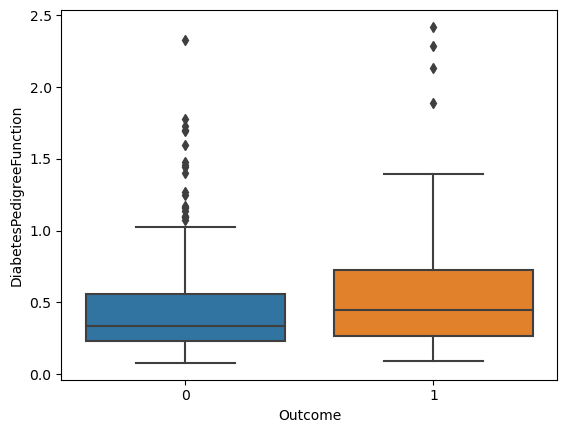

In [135]:
# How is DiabetesPedigreeFunction related to the outcome variable
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction',data=df)

<Axes: xlabel='Outcome', ylabel='Age'>

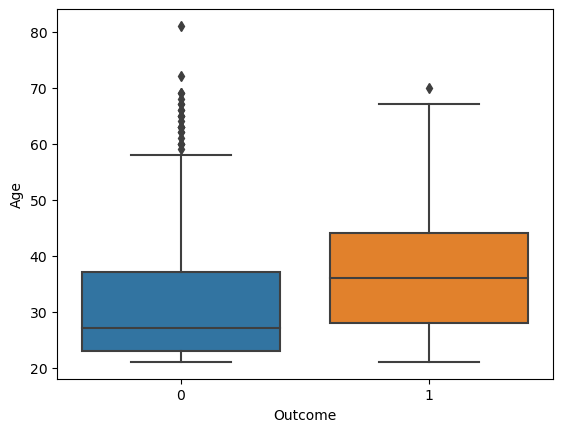

In [136]:
# How is Age related to the outcome variable
sns.boxplot(x='Outcome', y='Age',data=df)

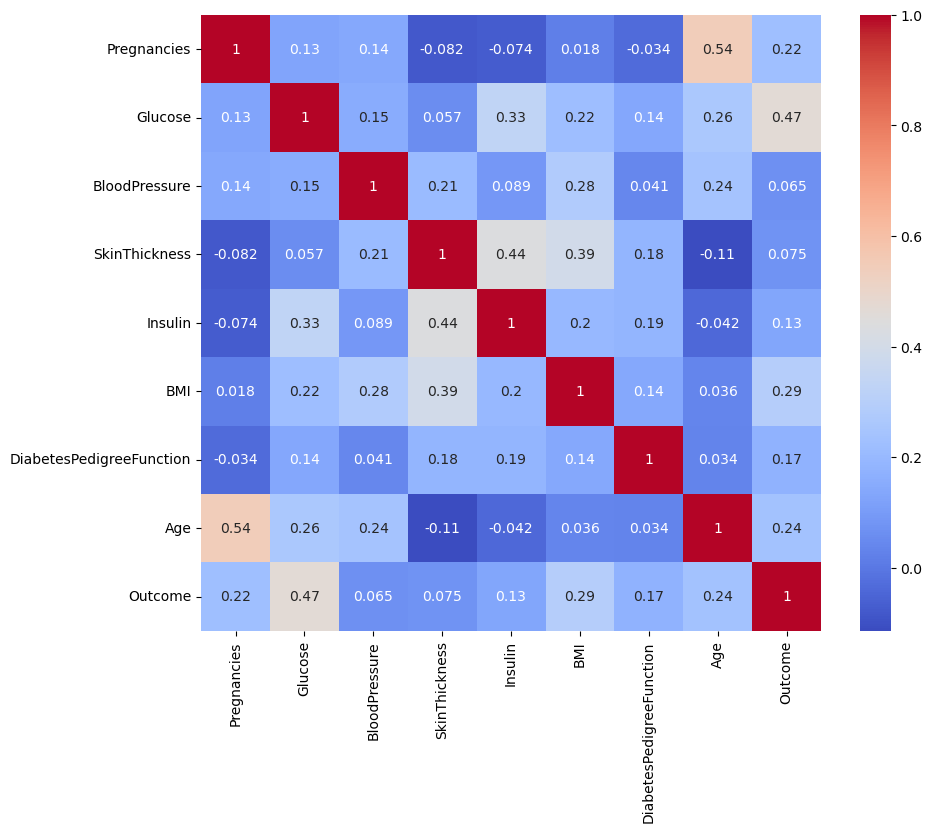

In [15]:
# Correlation between predictor variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('preclean_heatmap.png')  # Save the figure to a file
plt.show()  # Render the plot

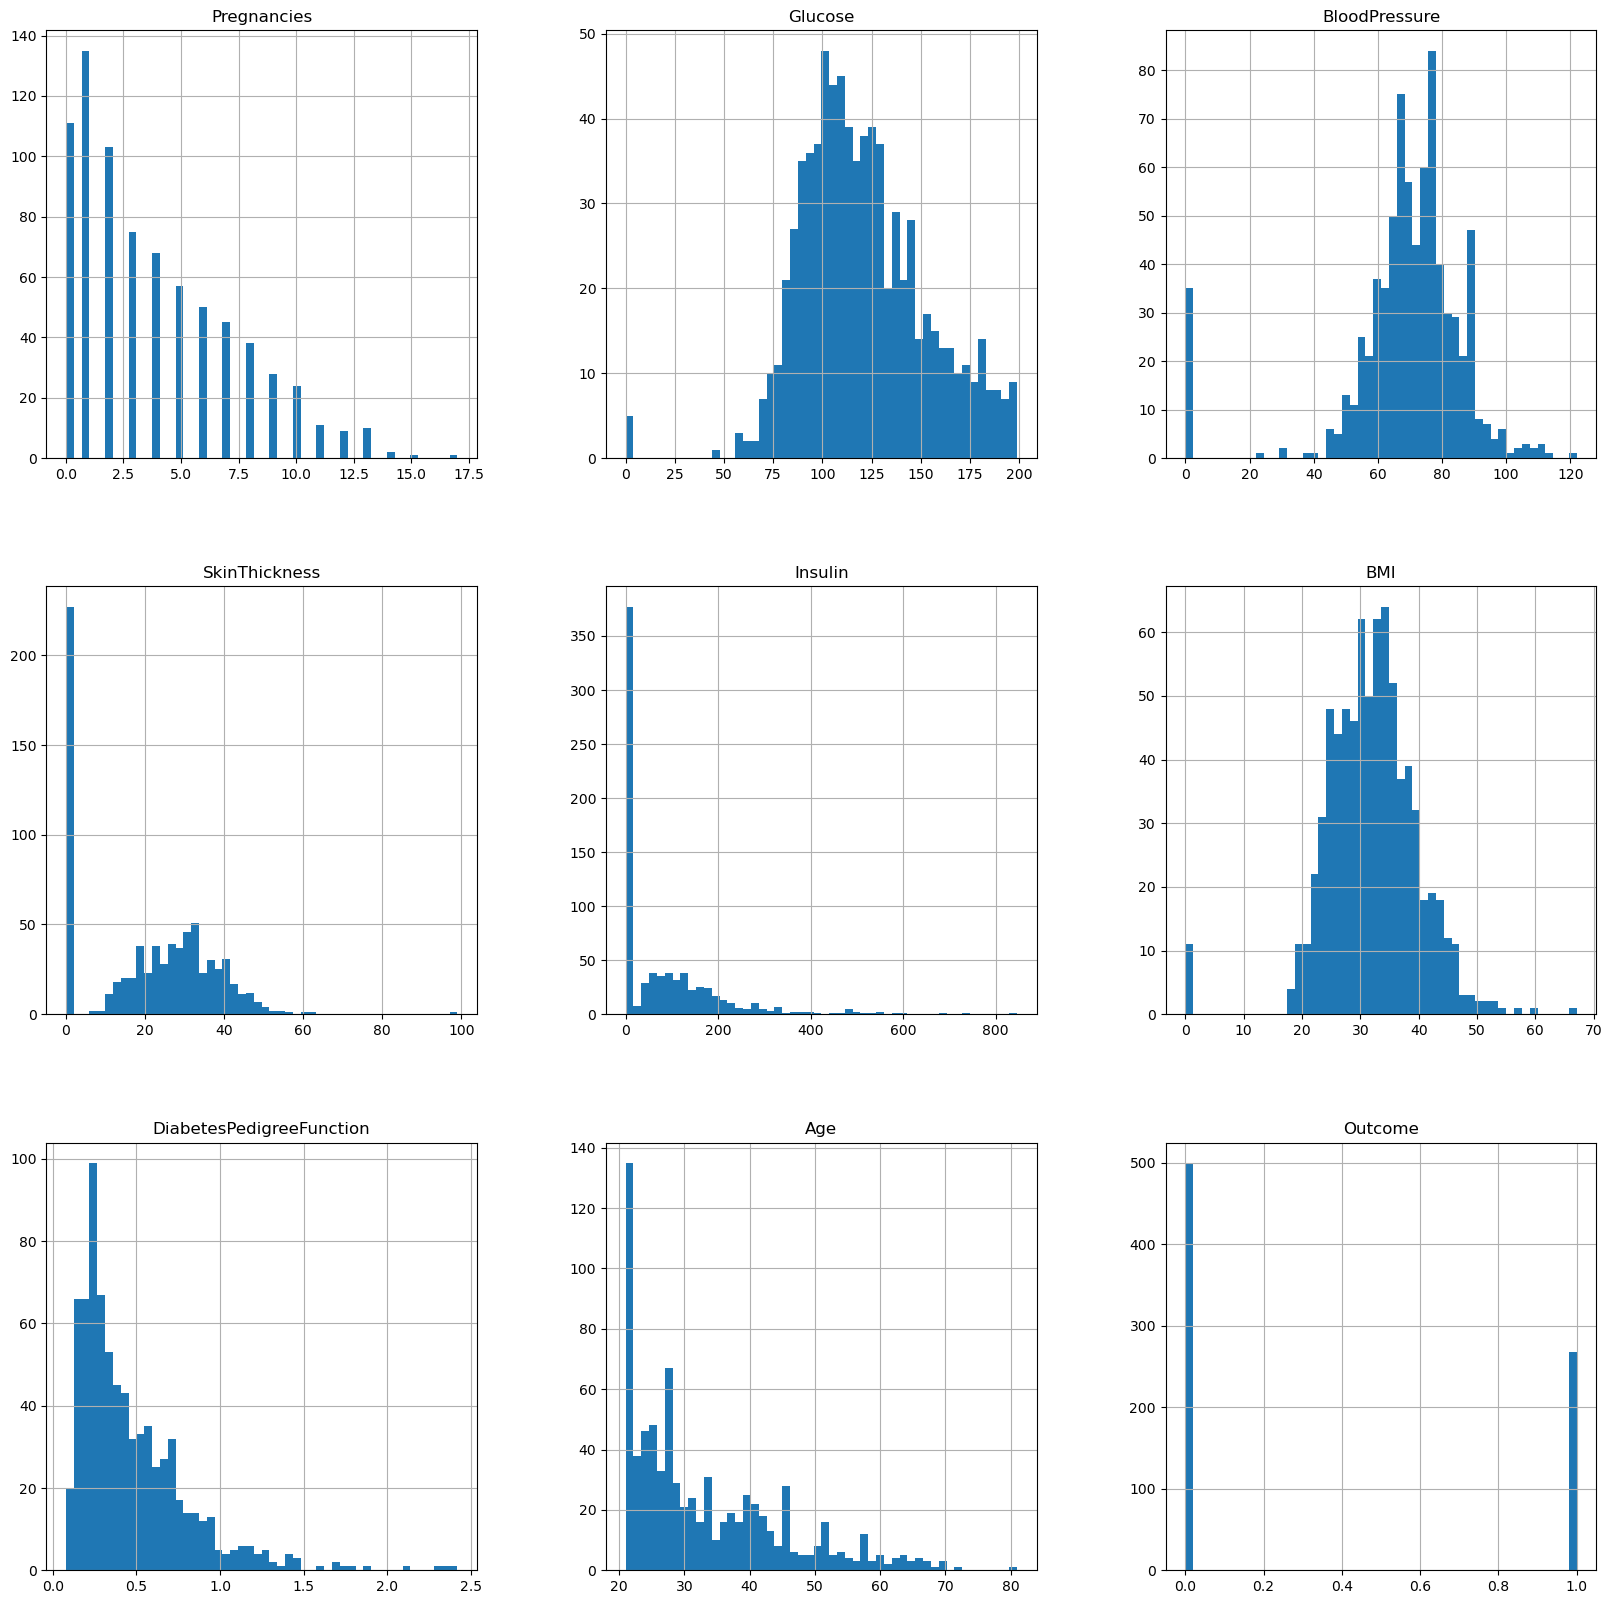

In [139]:
# Plot histogram for each variable to see their distribution
df.hist(bins=50, figsize=(20,20))
plt.show()

<Axes: xlabel='Pregnancies'>

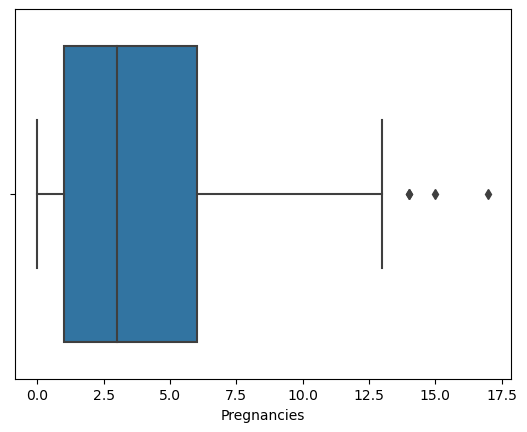

In [140]:
# Checking for outliers
sns.boxplot(x=df['Pregnancies'])


<Axes: xlabel='Glucose'>

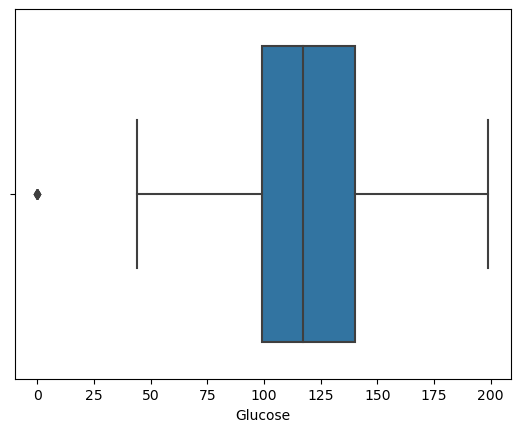

In [141]:
# Checking for outliers
sns.boxplot(x=df['Glucose'])


<Axes: xlabel='BloodPressure'>

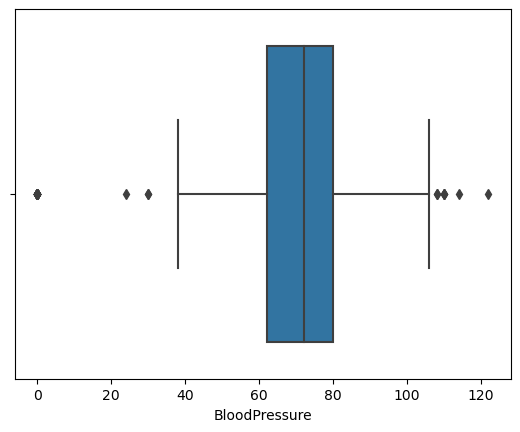

In [142]:
# Checking for outliers
sns.boxplot(x=df['BloodPressure'])

<Axes: xlabel='SkinThickness'>

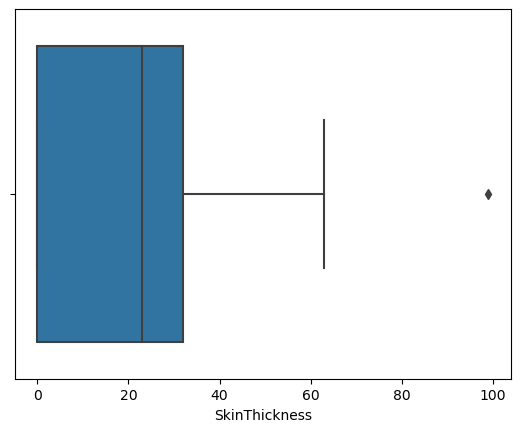

In [143]:
# Checking for outliers
sns.boxplot(x=df['SkinThickness'])

In [148]:
# Calculate number of outliers
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['SkinThickness'] < lower_bound) | (df['SkinThickness'] > upper_bound)]
print("Number of outliers: ", outliers.shape[0])


Number of outliers:  1


<Axes: xlabel='Insulin'>

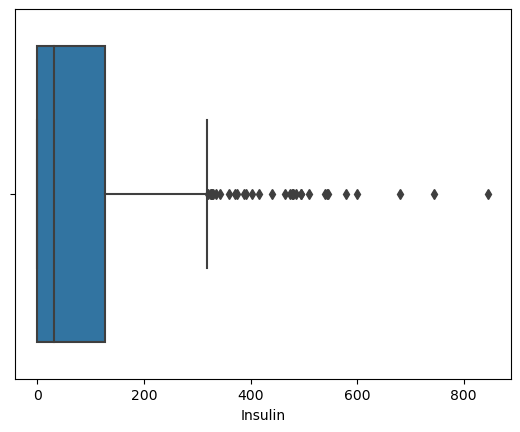

In [152]:
# Checking for outliers
sns.boxplot(x=df['Insulin'])

<Axes: xlabel='BMI'>

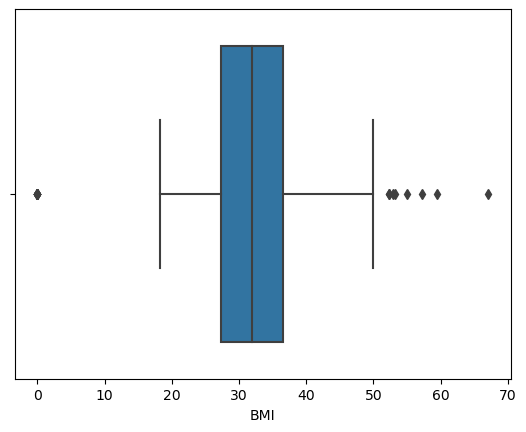

In [153]:
# Checking for outliers
sns.boxplot(x=df['BMI'])

In [154]:
# Check number of outliers in BMI>50
bmi_outliers=df[df['BMI']>50]
bmi_outliers['BMI'].shape


(8,)

<Axes: xlabel='DiabetesPedigreeFunction'>

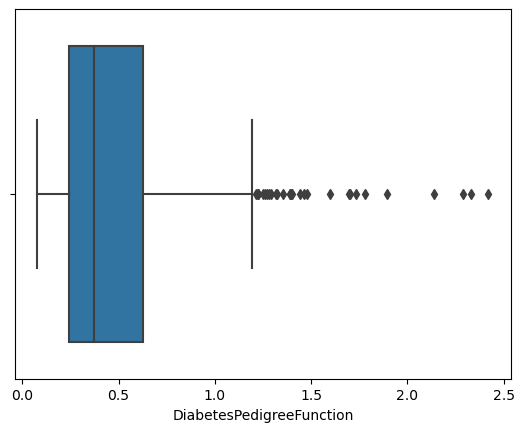

In [155]:
# Checking for outliers
sns.boxplot(x=df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age'>

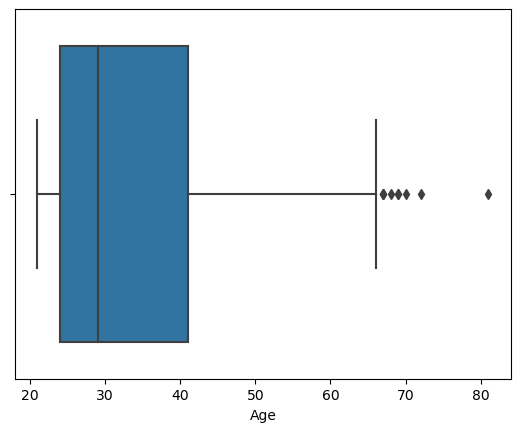

In [156]:
# Checking for outliers
sns.boxplot(x=df['Age'])

In [157]:
# Average age of people in dataset
average_age = df['Age'].mean()
print(average_age)


33.20338983050848


In [158]:
# Average glucose level for people with Diabetes and without Diabetes
average_glucose_with_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
average_glucose_without_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()
print('Average glucose with Diabetes:',average_glucose_with_diabetes)
print('Average glucose without Diabetes:', average_glucose_without_diabetes)

Average glucose with Diabetes: 141.04868913857678
Average glucose without Diabetes: 109.98


In [159]:
# Average BMI of people with Diabetes and without Diabetes
average_bmi_with_diabetes = df[df['Outcome'] == 1]['BMI'].mean()
average_bmi_without_diabetes = df[df['Outcome'] == 0]['BMI'].mean()
print('Average BMI with Diabetes:', average_bmi_with_diabetes)
print('Average BMI without Diabetes:', average_bmi_without_diabetes)

Average BMI with Diabetes: 35.144194756554306
Average BMI without Diabetes: 30.3042


<Axes: xlabel='Pregnancies', ylabel='Count'>

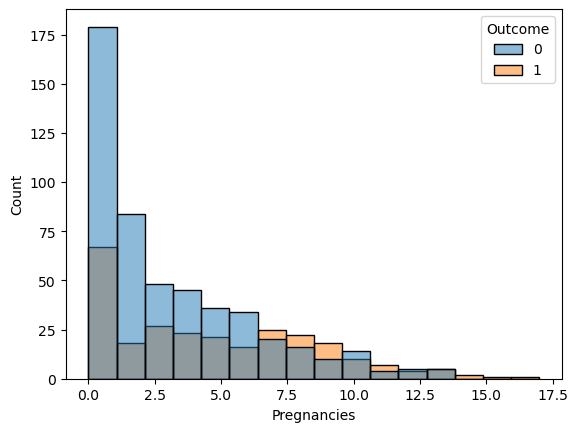

In [160]:
# Distribution of Pregnancies with and without Diabetes
sns.histplot(df, x='Pregnancies', hue='Outcome')


<Axes: xlabel='Glucose', ylabel='Count'>

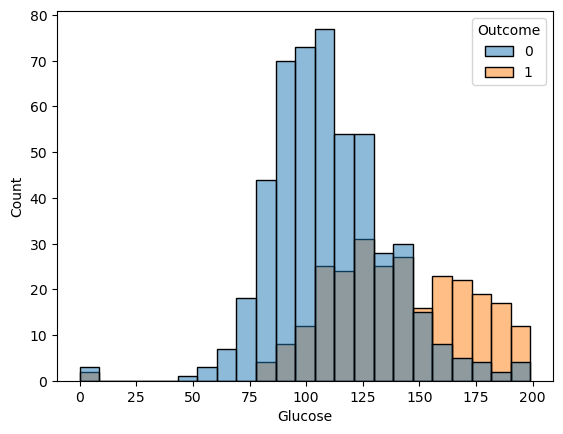

In [161]:
# Distribution of Glucose with and without Diabetes
sns.histplot(df, x='Glucose', hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

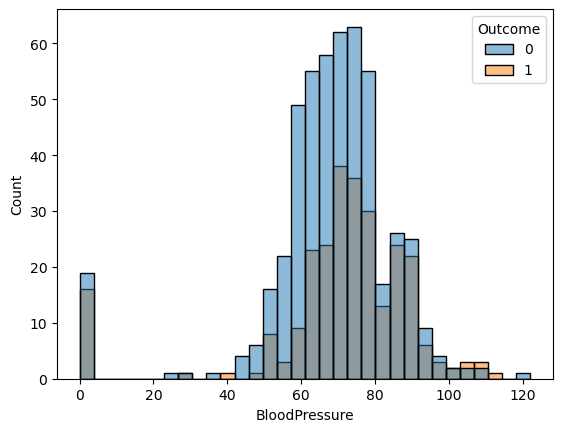

In [162]:
# Distribution of BloodPressure with and without Diabetes
sns.histplot(df, x='BloodPressure', hue='Outcome')

<Axes: xlabel='SkinThickness', ylabel='Count'>

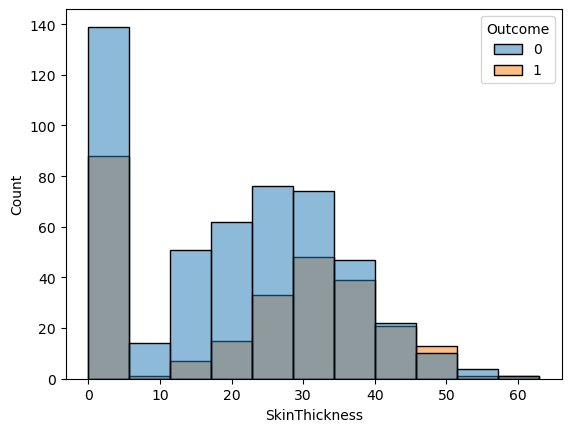

In [163]:
# Distribution of SkinThickness with and without Diabetes
sns.histplot(df, x='SkinThickness', hue='Outcome')

<Axes: xlabel='Insulin', ylabel='Count'>

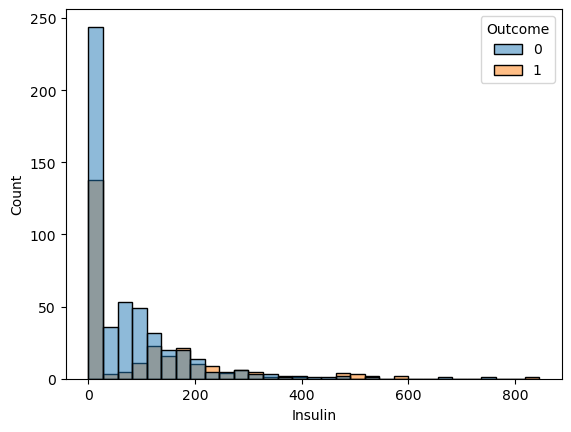

In [164]:
# Distribution of Insulin with and without Diabetes
sns.histplot(df, x='Insulin', hue='Outcome')

<Axes: xlabel='BMI', ylabel='Count'>

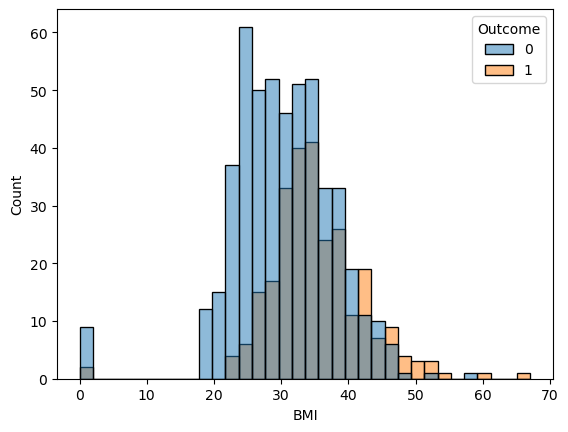

In [165]:
# Distribution of BMI with and without Diabetes
sns.histplot(df, x='BMI', hue='Outcome')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

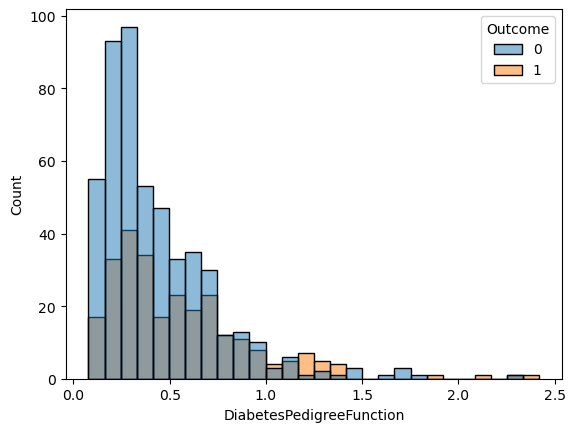

In [166]:
# Distribution of DiabetesPedigreeFunction with and without Diabetes
sns.histplot(df, x='DiabetesPedigreeFunction', hue='Outcome')

<Axes: xlabel='Age', ylabel='Count'>

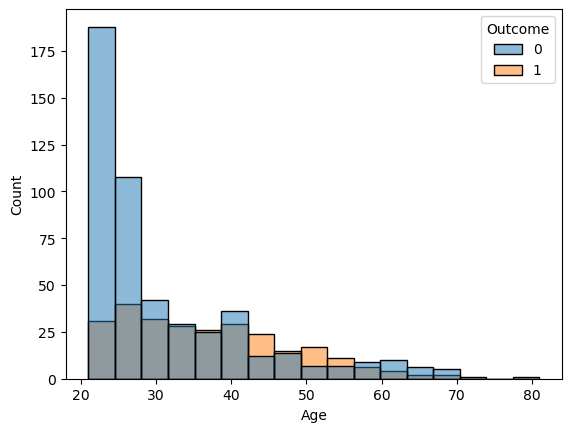

In [167]:
# Distribution of Age with and without Diabetes
sns.histplot(df, x='Age', hue='Outcome')

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [16]:
# Replace the zero values of the below columns with the mean value of the column data
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    mean = df[df[column] != 0][column].mean()
    df[column] = df[column].replace(0, mean)


In [17]:
# Replace value of BMI>50 with mean of BMI instead of deleting them (because there are only 8)
df["BMI"] = df["BMI"].apply(lambda x: df.BMI.mean() if x>50 else x)


In [18]:
outlier_index = df[df['SkinThickness'] == 99].index
df = df.drop(outlier_index)

In [171]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.024074,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


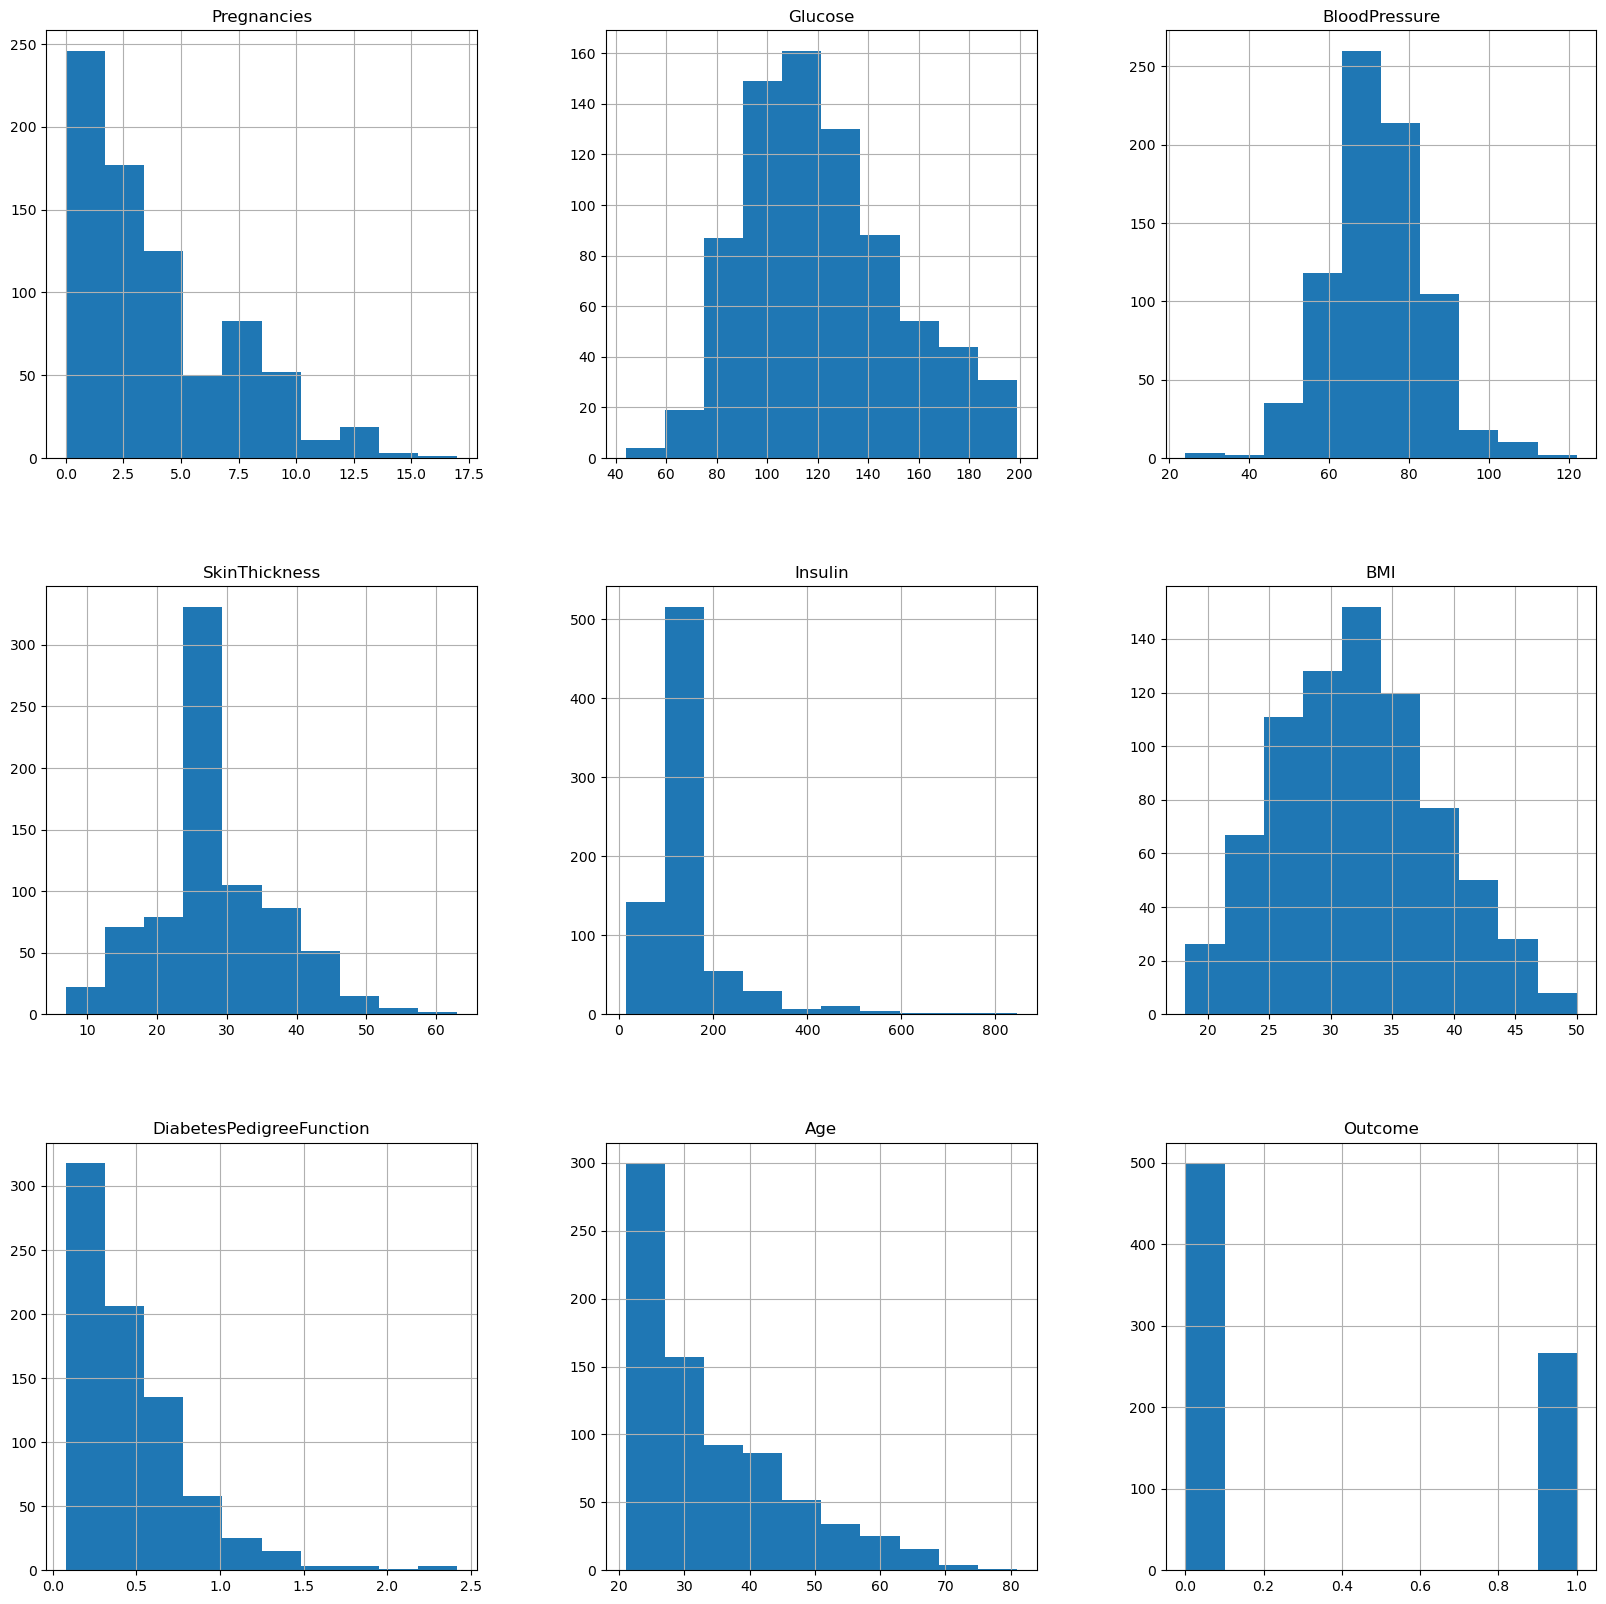

In [19]:
# Plot histograms for each variable to see their distribution after replacing zeros and and dealing with the BMI outliers
hist_axes = df.hist(figsize = (20,20))

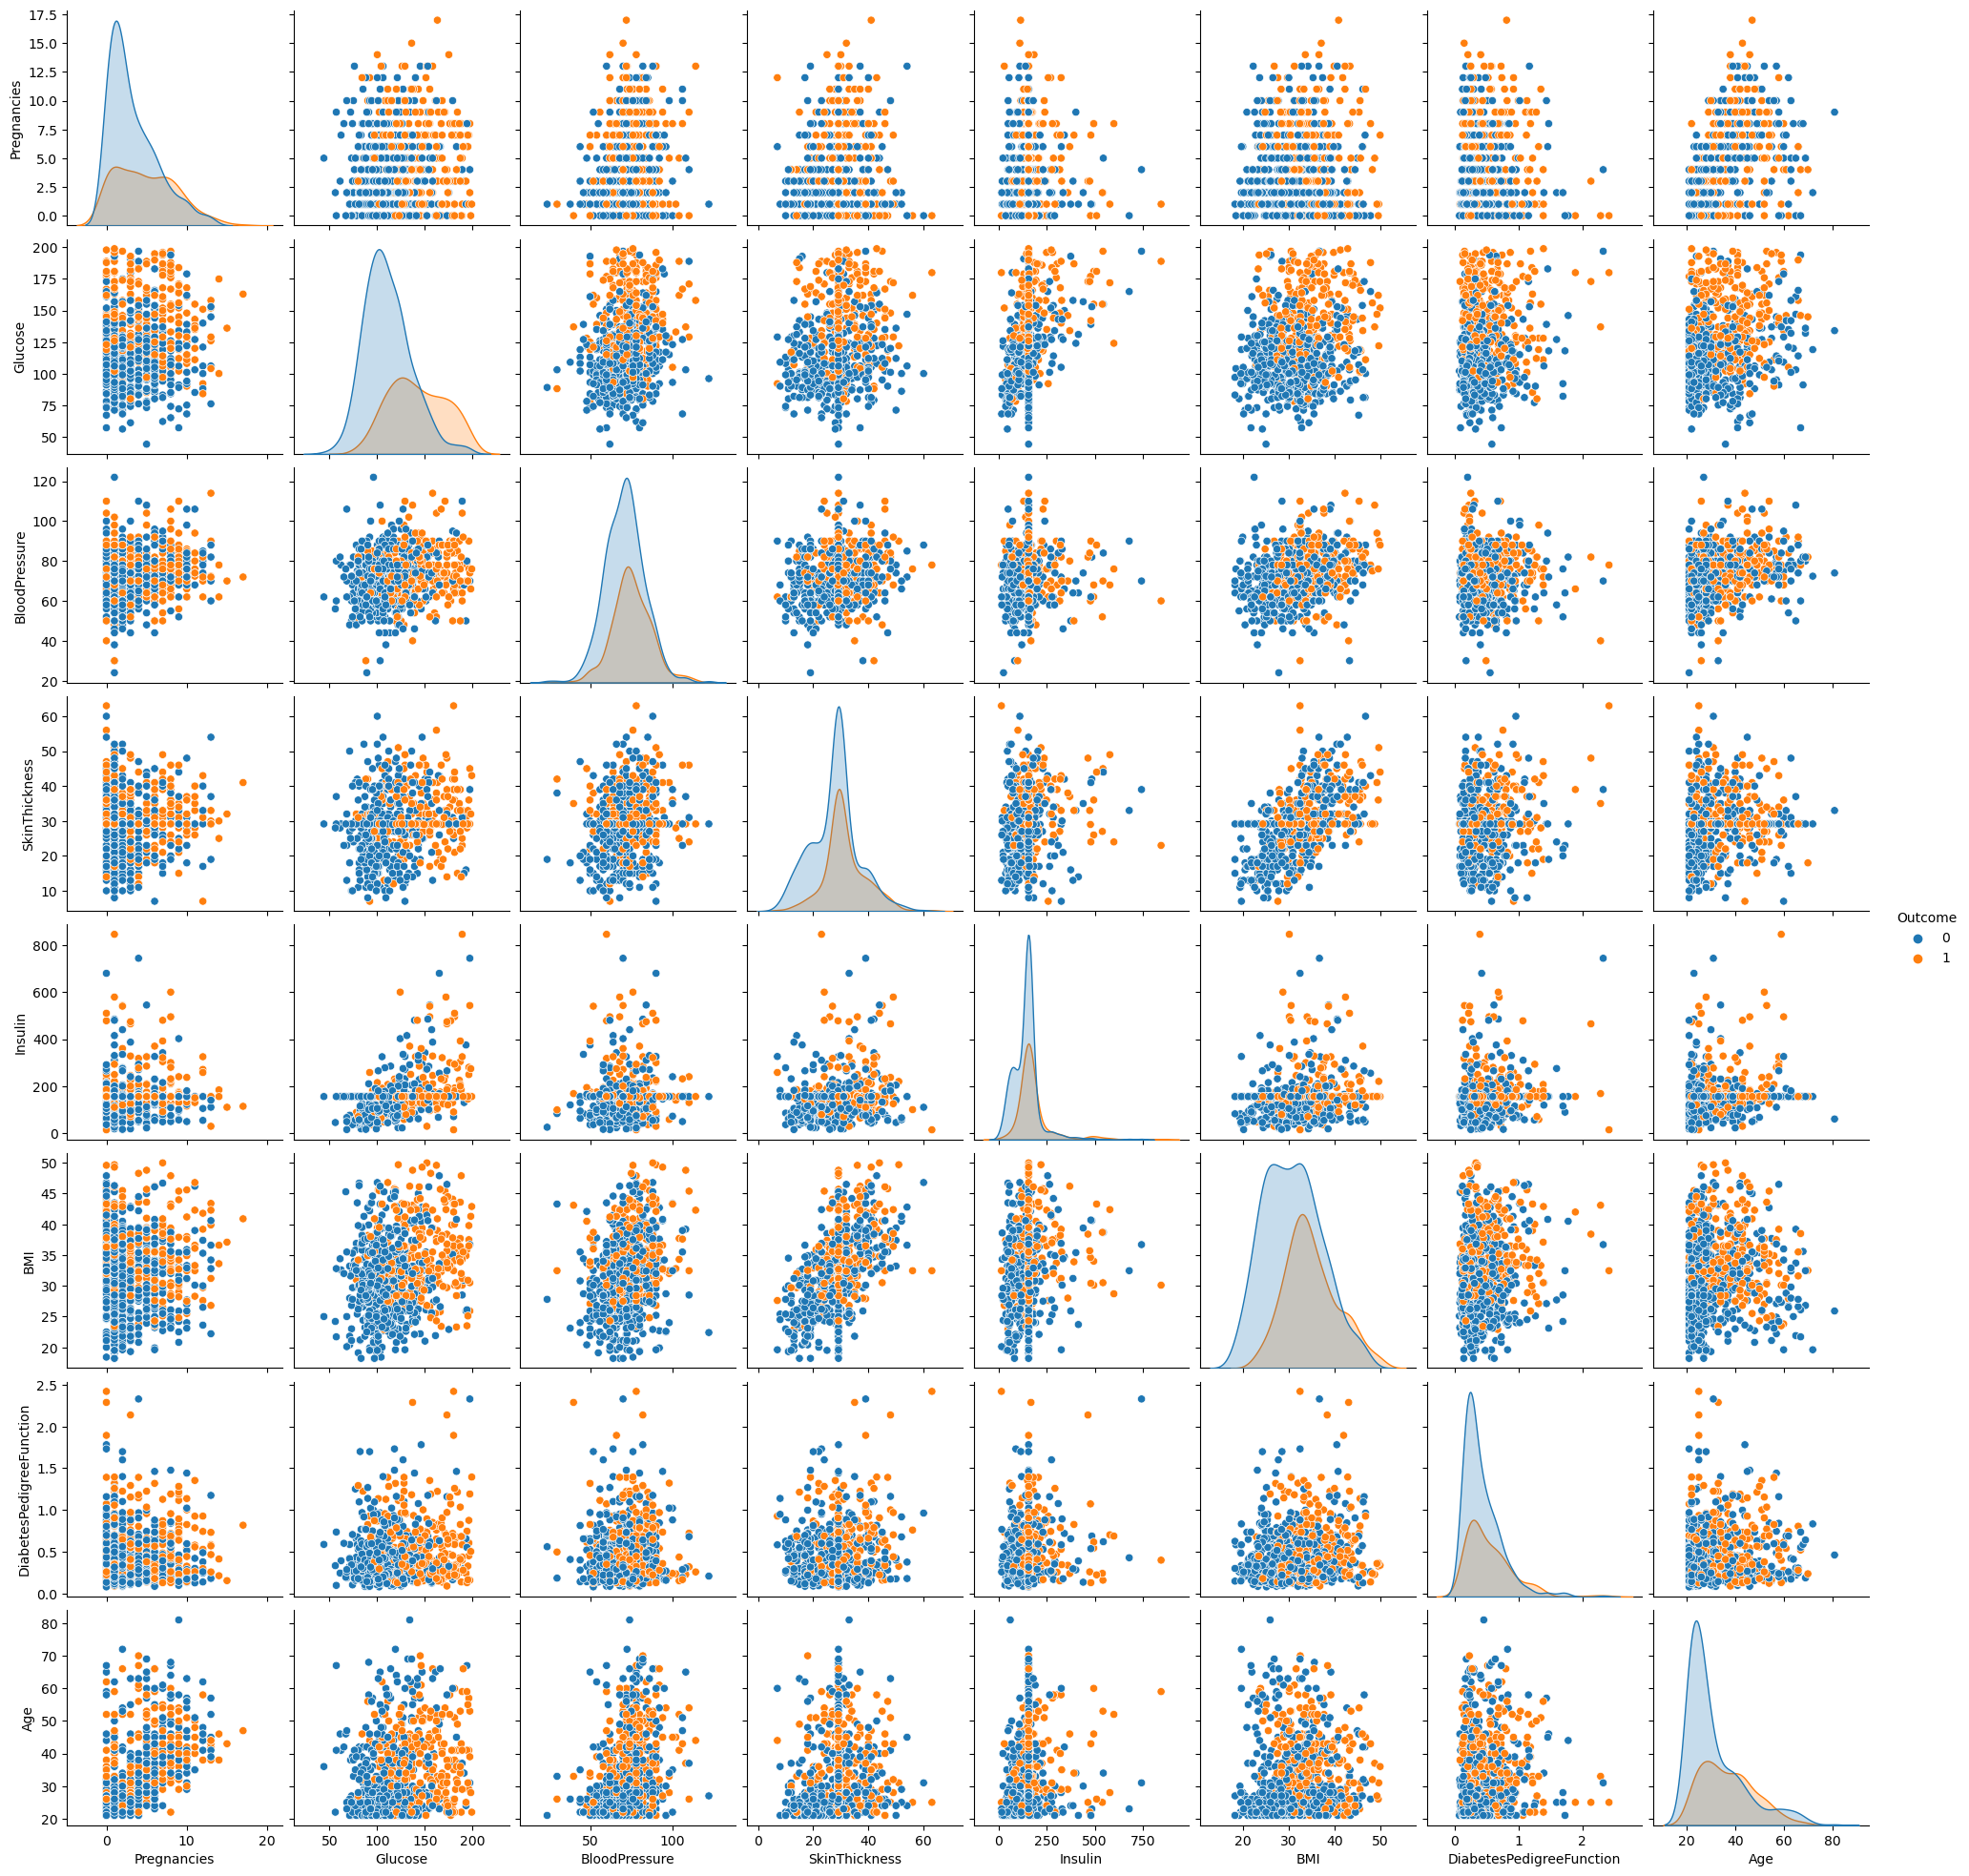

In [21]:
# Create scatter plot to see the relationship among pairs of predictor variables
pairplot = sns.pairplot(df, hue='Outcome')

# Save the pair plot as an image
plt.savefig('pairplot.png')

# Display the pair plot (optional)
plt.show()


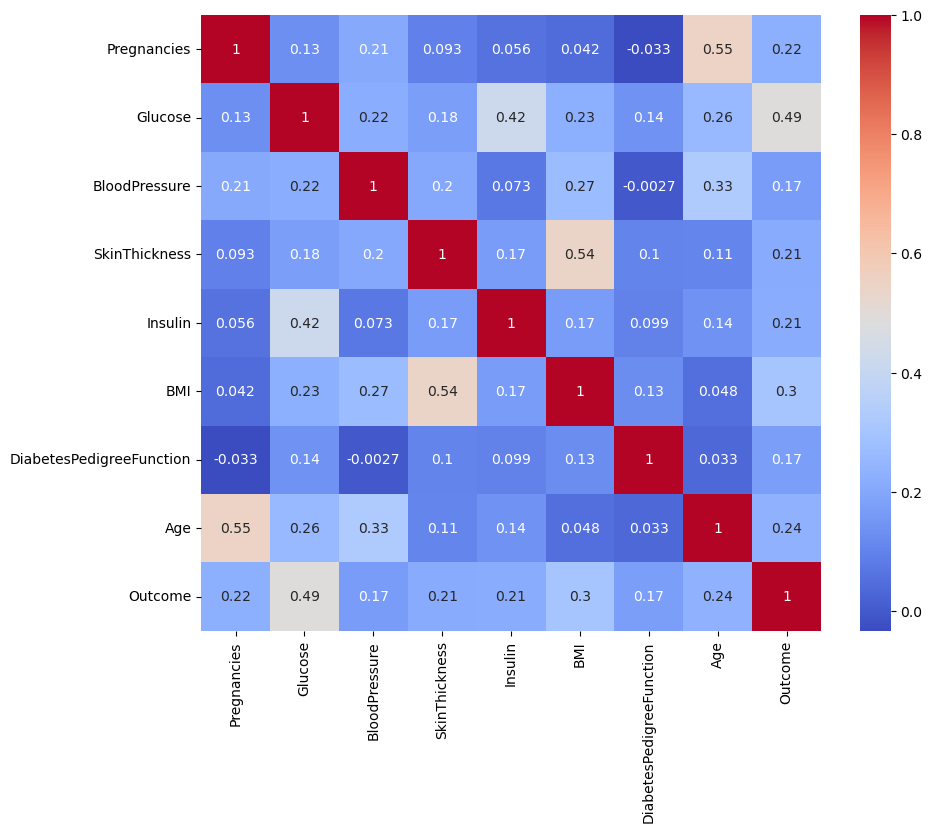

In [20]:
# Correlation between predictor variables after data cleaning
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig('cleaned_heatmap.png')  # Save the figure to a file
plt.show()  # Render the plot

In [175]:
plt.savefig('cleaned_heatmap.png')  # Save the figure to a file


<Figure size 640x480 with 0 Axes>

In [176]:
# Separate data and labels
X=df.drop(columns='Outcome', axis=1)
Y=df['Outcome']

In [177]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000  155.548223  33.6   
1              1     85.0           66.0      29.000000  155.548223  26.6   
2              8    183.0           64.0      29.024074  155.548223  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000  155.548223  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      29.024074  155.548223  30.1   
767            1     93.0           70.0      31.000000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [178]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 767, dtype: int64


In [179]:
# Scale the data
scaler=StandardScaler()
scaler.fit(X)
standardized_df=scaler.transform(X)
print(standardized_df)

[[ 0.63894165  0.87128135 -0.03376892 ...  0.21732465  0.4686223
   1.43386318]
 [-0.84521415 -1.20696234 -0.52979927 ... -0.87472473 -0.36444028
  -0.18809507]
 [ 1.23260397  2.02586117 -0.69514272 ... -1.38954802  0.60444772
  -0.10272885]
 ...
 [ 0.34211049 -0.01939452 -0.03376892 ... -0.93712756 -0.68438461
  -0.27346129]
 [-0.84521415  0.14554546 -1.02582962 ... -0.32870004 -0.37047697
   1.17776451]
 [-0.84521415 -0.94305838 -0.19911237 ... -0.28189792 -0.47310062
  -0.87102486]]


In [180]:
# Split the dataset into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


In [181]:
print(X.shape, X_train.shape, X_test.shape)

(767, 8) (613, 8) (154, 8)


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [182]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix


In [183]:
# Create and train a Logistic Regression model to predict whether a person has diabetes or not
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [184]:
# make predictions on the test data
Y_pred_lr = lr_model.predict(X_test)

In [185]:
# Evaluate the Logistic Regression model
print("Accuracy of Logistic Regression: ", accuracy_score(Y_test, Y_pred_lr))

# Print classification report
print("Classification Report of Logistic Regression: ")
print(classification_report(Y_test, Y_pred_lr))

# Print ROC AUC score
print("ROC-AUC of Logistic Regression: ", roc_auc_score(Y_test, Y_pred_lr))

# Print confusion matrix
print("Confusion Matrix of Logistic Regression: ")
print(confusion_matrix(Y_test, Y_pred_lr))


Accuracy of Logistic Regression:  0.7142857142857143
Classification Report of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.60      0.56      0.58        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154

ROC-AUC of Logistic Regression:  0.6777777777777778
Confusion Matrix of Logistic Regression: 
[[80 20]
 [24 30]]


In [186]:
# Create and train a RandomForest model to predict whether a person has diabetes or not
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [187]:
# make predictions on the test data
Y_pred_rf = rf_model.predict(X_test)

In [188]:
# Evaluate the RandomForest model
print("Accuracy of RandomForest: ", accuracy_score(Y_test, Y_pred_rf))

# Print classification report
print("Classification Report of RandomForest: ")
print(classification_report(Y_test, Y_pred_rf))

# Print ROC AUC score
print("ROC-AUC of RandomForest: ", roc_auc_score(Y_test, Y_pred_rf))


# Print confusion matrix
print("Confusion Matrix of RandomForest : ")
print(confusion_matrix(Y_test, Y_pred_rf))

Accuracy of RandomForest:  0.7272727272727273
Classification Report of RandomForest: 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       100
           1       0.62      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154

ROC-AUC of RandomForest:  0.6877777777777779
Confusion Matrix of RandomForest : 
[[82 18]
 [24 30]]


In [190]:
# Create and train an XGBoost classifier to predict whether a person has diabetes or not
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [191]:
# Make predictions on the test set
Y_pred = xgb_model.predict(X_test)

In [192]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Print classification report
print(classification_report(Y_test, Y_pred))

# Print ROC AUC score
print("ROC-AUC of XGBoost: ", roc_auc_score(Y_test, Y_pred))

# Print confusion matrix
print("Confusion Matrix of XGBoost classifier : ")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 73.38%
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154

ROC-AUC of XGBoost:  0.6842592592592592
Confusion Matrix of XGBoost classifier : 
[[85 15]
 [26 28]]


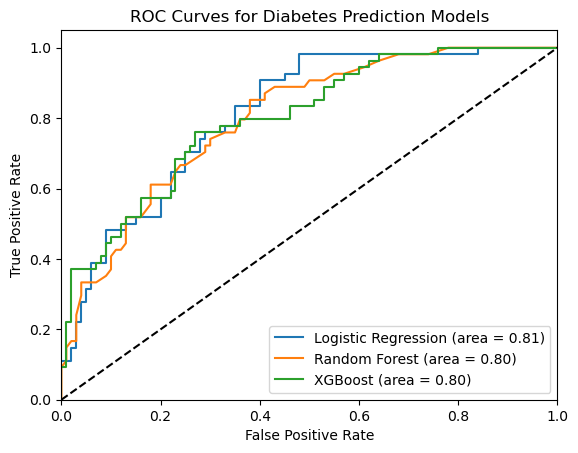

In [193]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the probabilities for Logistic Regression
probs_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Predict the probabilities for RandomForest
probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Predict the probabilities for XGBoost
probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Prediction Models')
plt.legend(loc="lower right")
plt.show()


In [211]:
# Use GridSearchCV to tune Logistic Regression Model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Specify parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# Initialize and fit GridSearchCV
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

# Print the best parameters
print(grid.best_params_)

#grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, refit=True, verbose=3)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.675 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.764 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.634 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.721 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.697 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.667 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.724 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.618 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.721 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.721 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.715 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

The ROC AUC on test set: 0.8138888888888889


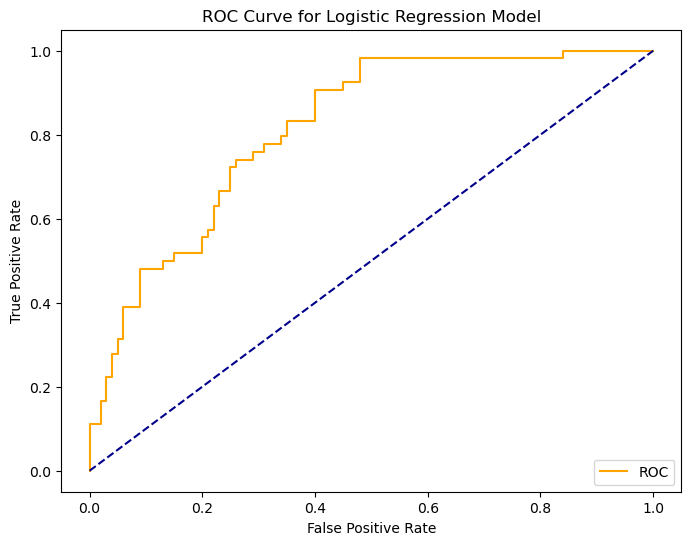

In [212]:
# Get the best parameter (regularization strength)
best_C = grid.best_params_['C']

# Create a new Logistic Regression model with the best parameter
log_reg_best = LogisticRegression(C=best_C, solver='liblinear')

# Fit the model
log_reg_best.fit(X_train, Y_train)

# Use the model to generate predictions on the test set
predictions_proba = log_reg_best.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC
roc_auc = roc_auc_score(Y_test, predictions_proba)
print(f'The ROC AUC on test set: {roc_auc}')

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, predictions_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Specify parameter grid
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]
}

# Initialize and fit GridSearchCV
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, refit=True, verbose=3, cv=3)
grid.fit(X_train, Y_train)

# Print the best parameters
print(grid.best_params_)



Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.790 total time=   0.2s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.2s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.750 total time=   0.1s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.795 total time=   0.3s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.775 total time=   0.3s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.760 total time=   0.3s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.771 total time=   0.1s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.775 tot

ROC AUC: 0.8061111111111111


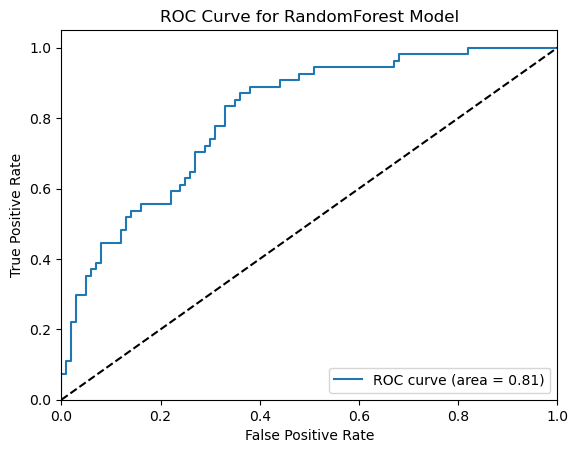

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a new RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=42)

# Fit the model
rf_best.fit(X_train, Y_train)

# Use the model to generate predictions on the test set
predictions_proba = rf_best.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC
roc_auc = roc_auc_score(Y_test, predictions_proba)

# Print the ROC AUC
print('ROC AUC:', roc_auc)

# Calculate ROC curve (FPR and TPR)
fpr, tpr, _ = roc_curve(Y_test, predictions_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest Model')
plt.legend(loc="lower right")
plt.show()


In [194]:
#Use GridSearchCV to tune the XGBoost model parameters  
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Create a based model
xgb_model = xgb.XGBClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

grid_search.best_params_  # Prints the best parameters

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [195]:
# Use the optimal parameters to set a new XGBoost model to fit the data
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Fit the model
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

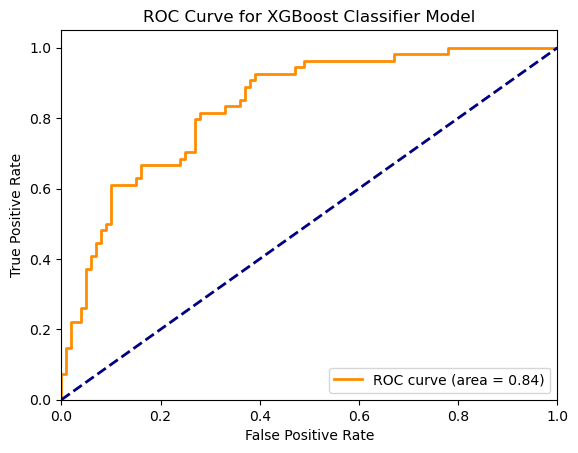

In [206]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions
xgb_model_probs = xgb_model.predict_proba(X_test)
xgb_model_preds = xgb_model_probs[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, xgb_model_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier Model')
plt.legend(loc="lower right")
plt.show()

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. The Exploratory Data Analysis reveals that Glucose levels exhibit the strongest correlation with the Outcome, i.e., the presence or absence of diabetes. This is followed by Body Mass Index (BMI), which ranks second in terms of correlation strength, and Age, which comes in third. Therefore, we can conclude that these three variables — Glucose levels, Body Mass Index (BMI), and Age — are significantly associated with the likelihood of an individual developing diabetes.

2. Given that the dataset was seemed imbalanced ( with 500 negative and 268 positive), I have carefully used a stratified train-test split approach to maintain the proportion of the classes in both training and testing sets. However, I decided against using oversampling techniques in this analysis to maintain the original distribution of the data and to avoid potential overfitting that can be caused by oversampling. The choice to not use oversampling techniques also stems from the nature of the machine learning models I have used in my analysis. Both RandomForest and XGBoost inherently handle class imbalance to a certain extent by constructing a multitude of decision trees and aggregating their results. These models are often robust against overfitting and are known for their ability to effectively classify instances even in scenarios with imbalanced datasets. Hence, it was decided to initially proceed without oversampling to evaluate the baseline performance of these models. 

3. To ensure the quality of the data for further analysis, certain preprocessing steps were taken. BMI values above 50, considered as outliers, were replaced with the mean BMI value to reduce skewness and potential bias in the dataset. Additionally, a single outlier in the skin thickness variable was identified and removed. This modification made a positive impact on the performance of our model. After performing hyperparameter tuning on the XGBoost model and retraining it on the modified data, a slight improvement in the AUC-ROC score was noted, from 0.80 to 0.83. This suggests that preprocessing steps such as handling of outliers can contribute to enhancing the model's predictive power.

4. In this analysis, three distinct models were applied: Logistic Regression, Random Forest, and XGBoost. Each model was selected based on its suitability for the binary classification task at hand, with Random Forest and XGBoost representing the ensemble category. Initial evaluations were based on the ROC AUC scores, and then the models were subjected to further refinement through hyperparameter tuning, where techniques such as GridSearchCV were employed. Post tuning, XGBoost emerged as the best model, reflecting a superior balance of bias and variance, and thereby offering the highest predictive accuracy for the dataset. This showcases the importance of exploring multiple models and tuning to optimize the performance of machine learning tasks.






